In [317]:
#metoda knn
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from datetime import datetime

In [318]:
# Wczytanie danych
data = pd.read_csv('dataset-knn.csv', sep=";")

In [319]:
data.head(n=10)

,Percentage of bad quality food eaten,Physical training (hour/month),Condition
0,0.9,0,B
1,0.5,7,A
2,0.2,1,A
3,0.3,5,A
4,0.1,8,G
5,0.1,10,G
6,0.2,3,A
7,0.5,4,A
8,0.9,1,B
9,0.0,0,A


In [320]:
data.rename(columns={'Percentage of bad quality food eaten': 'Percentage_of_bad_quality_food_eaten'}, inplace=True)
data.rename(columns={'Physical training (hour/month)': 'Physical_training_hourMonth'}, inplace=True)

In [321]:
data.head(n=10)
data.dtypes

Percentage_of_bad_quality_food_eaten    float64
Physical_training_hourMonth               int64
Condition                                object
dtype: object

In [322]:
data['Percentage_of_bad_quality_food_eaten'] = data.Percentage_of_bad_quality_food_eaten*100
data.head(n=10)

,Percentage_of_bad_quality_food_eaten,Physical_training_hourMonth,Condition
0,90.0,0,B
1,50.0,7,A
2,20.0,1,A
3,30.0,5,A
4,10.0,8,G
5,10.0,10,G
6,20.0,3,A
7,50.0,4,A
8,90.0,1,B
9,0.0,0,A


In [323]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

In [324]:
#Stworzenie funkcji
error = []

# Obliczenie błędu dokładności modelu dla poszczególnych wartości K
for i in range(1, 36):  
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Średni błąd')

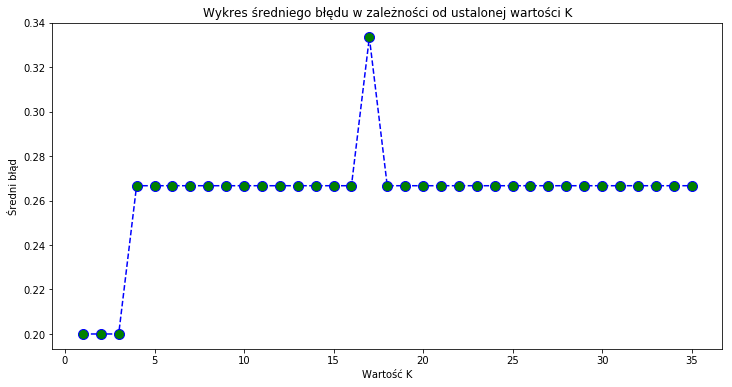

In [339]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 36), error, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=10)
plt.title('Wykres średniego błędu w zależności od ustalonej wartości K')  
plt.xlabel('Wartość K')  
plt.ylabel('Średni błąd') 

In [355]:
#Skonstruowanie modelu. Ustalenie wartości K=3. Ponieważ dla takiej wartości średni błąd wynosi najmniej.
model = KNeighborsClassifier(n_neighbors=3)

In [356]:
#Transformacja na wartości liczbowe dla zmiennej condition 
label=le.fit_transform(data.Condition)
label
#Liczba 1 - oznacza kondycję B(bad) reprezentowana próbka odznacza się złą kondycją
#Liczba 0 - oznacza kondycję A(average) reprezentowana probka odznacza się średnią kondycją
# Liczba 2 - oznacza kondycję G(good) reprezentowana próbka odznacza się dobrą kondycją

array([1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0])

In [357]:
features=list(zip(data.Percentage_of_bad_quality_food_eaten, data.Physical_training_hourMonth))

In [358]:
# Trening modelu przy użyciu zmiennej objaśnianej i zmiennych objaśniających
model.fit(features,label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [359]:
#Predykcja jaką kondycję będzie reprezentować osoba, której styl odżywiania to w 90% niezdrowe jedzenie oraz
# brak wysiłku fizycznego w ciągu miesiąca.
predicted= model.predict([[90,0]])
print(predicted)

[1]


In [360]:
#Dla próbki o parametrach 90 (90% posiłków spożywanych w ciągu miesiąca jest niezdrowych)
# i 0 (0 godzin treningu w ciągu miesiąca) model przewidział złą kondycję -> [1]. Predykcja jest zgodna z prawdziwymi danymi

In [361]:
#Predykcja jaką kondycję będzie reprezentować osoba, której styl odżywiania to w 10% niezdrowe jedzenie oraz
# 10 godzin wysiłku fizycznego w ciągu miesiąca.
predicted= model.predict([[10,10]])
print(predicted)

[2]


In [362]:
#Dla próbki o parametrach 10 (10% posiłków spożywanych w ciągu miesiąca jest niezdrowych)
# i 10 (godzin treningu w ciągu miesiąca) model przewidział złą kondycję -> [2]. Predykcja jest zgodna z prawdziwymi danymi

In [363]:
#Predykcja jaką kondycję będzie reprezentować osoba, której styl odżywiania to w 100% zdrowe jedzenie oraz
# brak wysiłku fizycznego w ciągu miesiąca.
predicted= model.predict([[0,0]])
print(predicted)

[0]


In [364]:
#Dla próbki o parametrach 0 (0% posiłków spożywanych w ciągu miesiąca jest niezdrowych)
# i 0 (0 godzin treningu w ciągu miesiąca) model przewidział średnią kondycję -> [0]. Predykcja jest zgodna z prawdziwymi danymi

In [365]:
# Zaimportowanie biblioteki umożliwiającej podział danych treningowych i testowych

from sklearn.model_selection import train_test_split

# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3) 
# Ustawienie standardowego stosunku procentowego 70:30. 70% danych ustala się jako treningowe, resztę jako testowe.

In [366]:
#Trening modelu na podstawie wczesniej podzielonych danych
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

In [367]:
#Zaimportowanie biblioteki 'metrics' umożliwiającej sprawdzenie dopasowania modelu
from sklearn import metrics
# Sprawdzenie jak dokładny jest model predykcyjny
print("Dokładność modelu wynosi:",metrics.accuracy_score(y_test, y_pred))

Dokładność modelu wynosi: 0.8


Model przy ustaleniu parametru K=3 jest dopasowany do danych w 80%.